In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
# Breast cancer data, with diagnosis as target variable
print(df.loc[:, 1].value_counts())

y = df.loc[:, 1].values
X = df.loc[:, 2:].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

1
B    357
M    212
Name: count, dtype: int64


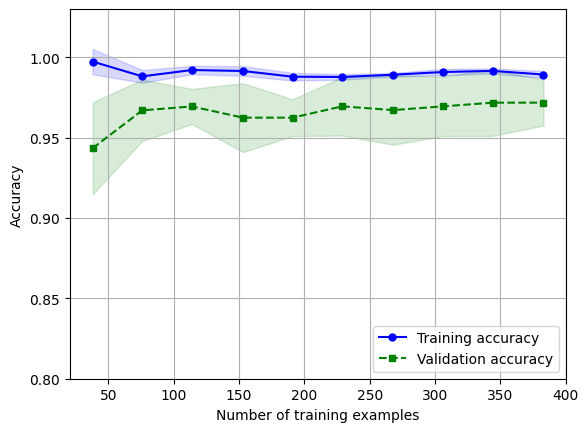

In [6]:
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000)) # max_iter helps us avoid convergence issues for smaller dataset or
# extreme regularization

# The learning curve takes an estimator, and performs cross validation on it, storing the accuracy along the way

train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10), # Break the training dataset into 10 subsets
    cv=10, # Use 10 folds and 10 estimators
    n_jobs=-1
)
# train_scores[0] has 9/10 estimators training on the first 1/10 data points and the one set that has those as its test set will use a different subset
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()


Since the training seems to have a pretty high accuracy, and the training and validation accuracy seem to converge to it reasonably, this has low bias and reasonably low variance (good bias variance tradeoff).

If both curves were translated in the -y direction, that would indicate a higher bias (probably underfitting/bad model). Can try to modify this by constructing additional features (or collecting more feautres) to increase the number of parameters. If using a stringent regularization, this can be relaxed a bit (lower the regularization penalty).

If the curves were separated more, that would indicate high variance (lack of ability to generalize to the validation set - likely overfitting). This might be helped by collecting more data, or performing feature selection/extraction.

The learning curve helps us diagnose these symptoms.